In [1]:
# We calculate the "stress" of the belief vector i as
import numpy as np
def stress_slow(belief_vector, interaction_matrix): # Element-wise construction of H (slow)
    H = 0
    num_nodes = len(belief_vector)
    for i in range(num_nodes):
        for j in range(num_nodes):
            H += - interaction_matrix[i, j] * belief_vector[i] * belief_vector[j] 
    return H

def stress(belief_vector, interaction_matrix): # Matrix multiplication H = - (b dot Jb) (fast)
    belief_vector = np.array(belief_vector)
    interaction_matrix = np.array(interaction_matrix)
    H = - np.dot(belief_vector, np.dot(interaction_matrix, belief_vector))
    return H

(98, 98)
Iteration 0, Current Cost: [[ 3.72838098e+00]
 [-6.52307702e+00]
 [ 1.69670472e+00]
 [ 2.24436446e+00]
 [-3.58559653e-02]
 [-5.71702348e-01]
 [-6.88617613e-01]
 [ 1.57428753e+00]
 [-9.11100046e-01]
 [-2.61849308e+00]
 [ 3.89192223e+00]
 [ 2.70977669e+00]
 [-2.63422441e+00]
 [-3.09335668e+00]
 [ 1.44691694e+00]
 [-4.38291783e+00]
 [-6.38550981e-01]
 [-1.76781930e+00]
 [-2.21988848e+00]
 [ 1.56860495e-01]
 [-4.99254466e-01]
 [-1.30989625e-01]
 [-1.47135060e+00]
 [ 1.43103546e+00]
 [-1.28193987e+00]
 [ 3.88255400e+00]
 [ 1.54327539e+00]
 [-1.58345582e+00]
 [-4.05946991e-01]
 [ 3.21696385e+00]
 [ 5.03431252e+00]
 [-9.14068388e-01]
 [-3.12031593e+00]
 [ 3.16732982e+00]
 [ 6.84615507e-01]
 [ 9.40858353e-01]
 [-1.33413580e+00]
 [ 5.19824176e+00]
 [ 4.94710355e-01]
 [ 1.57100536e+00]
 [ 5.24680955e-01]
 [ 1.10355536e+00]
 [ 7.33347297e-02]
 [-3.03902814e+00]
 [ 4.35571760e+00]
 [ 1.46113159e+00]
 [-1.97121135e+00]
 [ 1.15563763e+00]
 [-8.16212835e-01]
 [ 2.48573452e+00]
 [ 1.76965686e

c:\Users\timbo\Documents\GitHub\BeliefNetworkEvo\nbk\../src\simulated_annealing.py:61: RuntimeWarning: overflow encountered in exp
  acceptance_prob_vector = np.where(new_cost_vector < old_cost_vector, 1, np.exp((old_cost_vector - new_cost_vector) / temperature))


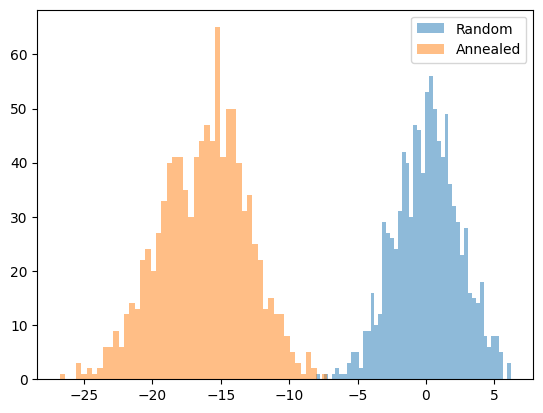

In [27]:
import sys
sys.path.append('../src')

# Import the network
import networkx as nx
belief_network = nx.read_graphml('out/2000_2003.graphml')

# Print a list of the node names
node_names = belief_network.nodes()

# Make histogram of K random belief vectors
K = 1000
interaction_matrix = nx.to_numpy_array(belief_network)
print(interaction_matrix.shape)

# Generate K random belief vectors
initial_vectors = np.random.choice([-1, 0, 1], size=(K, 98))

# Calculate stress for each belief vector
count_random = [stress(belief_vec, interaction_matrix) for belief_vec in initial_vectors]

# Calculate stress for each belief vector after annealing them
from simulated_annealing import simulated_annealing
from simulated_annealing import hamiltonian_objective_function
from simulated_annealing import flip_step_function
annealed_vectors, costs = simulated_annealing(initial_vectors, 100, 0.9, int(1e6), 
                              lambda vecs: hamiltonian_objective_function(vecs, interaction_matrix),
                              lambda vecs: flip_step_function(vecs, num_flips=1))
count_annealed = [stress(belief_vec, interaction_matrix) for belief_vec in annealed_vectors]

# Compare the stress histograms 
import matplotlib.pyplot as plt
plt.hist(count_random, bins=50, alpha=0.5, label='Random')
plt.hist(count_annealed, bins=50, alpha=0.5, label='Annealed')
plt.legend(loc='upper right')
plt.show()

In [3]:
# First we need to import the data
%load_ext autoreload
%autoreload 2
import sys
import pyreadstat as prs
sys.path.append('../src')

raw_df, meta = prs.read_sas7bdat("data\gss7222_r3.sas7bdat")

In [4]:
# Now we can clean the data, first through the original cleaning function, and then the second that deals with the median-method cases.
our_variables = ["PARTYID","POLVIEWS","NATSPAC","NATENVIR","NATHEAL","NATCITY","NATCRIME","NATDRUG","NATEDUC","NATRACE","NATARMS",
"NATAID","NATFARE","NATROAD","NATSOC","NATMASS","NATPARK","NATCHLD","NATSCI","EQWLTH","SPKATH","COLATH","LIBATH","SPKRAC","COLRAC","LIBRAC","SPKCOM","COLCOM","LIBCOM","SPKMIL","COLMIL","LIBMIL","SPKHOMO",
"COLHOMO","LIBHOMO","SPKMSLM","COLMSLM","LIBMSLM","CAPPUN","GUNLAW","COURTS","GRASS","ATTEND","RELITEN","POSTLIFE","PRAYER","AFFRMACT","WRKWAYUP","HELPFUL",
"FAIR","TRUST","CONFINAN","CONBUS","CONCLERG","CONEDUC","CONFED","CONLABOR","CONPRESS","CONMEDIC","CONTV","CONJUDGE","CONSCI","CONLEGIS","CONARMY","GETAHEAD","FEPOL","ABDEFECT","ABNOMORE","ABHLTH","ABPOOR","ABRAPE","ABSINGLE","ABANY","SEXEDUC","DIVLAW","PREMARSX","TEENSEX","XMARSEX","HOMOSEX","PORNLAW",
"SPANKING","LETDIE1","SUICIDE1","SUICIDE2","POLHITOK","POLABUSE","POLMURDR","POLESCAP","POLATTAK","NEWS","TVHOURS","FECHLD","FEPRESCH","FEFAM","RACDIF1","RACDIF2","RACDIF3",
"RACDIF4","HELPPOOR","MARHOMO", "PRESLAST_NONCONFORM", "PRESLAST_DEMREP", "VOTELAST"]

import sys
sys.path.append('../src')

from clean_data_1 import transform_dataframe
df, metadata = transform_dataframe(raw_df)

from clean_data_2 import transform_dataframe
time_frame = [2000, 2001, 2002, 2003]
df_for_stress, metadata_stress = transform_dataframe(df, time_frame, metadata)
variables_in_df = df_for_stress.columns.tolist()


195 variables have all NaN values. They will be removed from the dataframe.
Index(['VOTE68', 'VOTE72', 'VOTE76', 'VOTE80', 'VOTE84', 'VOTE88', 'VOTE92',
       'VOTE04', 'VOTE08', 'VOTE12',
       ...
       'IF20WHO_TRUMP', 'IF20WHO_OTHER', 'IF20WHO_CANT_REMEMBER',
       'IF20WHO_DONT_KNOW', 'NATENRGY', 'SPKMSLM', 'COLMSLM', 'LIBMSLM',
       'RACOPEN', 'MARHOMO'],
      dtype='object', length=195)


In [8]:
# Print node names
print("Node names:", node_names)

# Print names of variables in the dataframe
print("Variables in dataframe:", df_for_stress.columns.tolist())


# Print names that overlap, names that only occur in the network, and names that only occur in the dataframe
overlap = set(node_names).intersection(set(variables_in_df))
only_network = set(node_names) - set(variables_in_df)
only_dataframe = set(variables_in_df) - set(node_names)
print("Overlap:", overlap)
print("Only network:", only_network)
print("Only dataframe:", only_dataframe)

# Reduce the dataframe to only the variables that overlap with the network
df_for_stress = df_for_stress[list(overlap)]

Node names: ['PARTYID', 'POLVIEWS', 'NATSPAC', 'NATENVIR', 'NATHEAL', 'NATCITY', 'NATCRIME', 'NATDRUG', 'NATEDUC', 'NATRACE', 'NATARMS', 'NATAID', 'NATFARE', 'NATROAD', 'NATSOC', 'NATMASS', 'NATPARK', 'NATCHLD', 'NATSCI', 'EQWLTH', 'SPKATH', 'COLATH', 'LIBATH', 'SPKRAC', 'COLRAC', 'LIBRAC', 'SPKCOM', 'COLCOM', 'LIBCOM', 'SPKMIL', 'COLMIL', 'LIBMIL', 'SPKHOMO', 'COLHOMO', 'LIBHOMO', 'CAPPUN', 'GUNLAW', 'COURTS', 'GRASS', 'ATTEND', 'RELITEN', 'POSTLIFE', 'PRAYER', 'AFFRMACT', 'WRKWAYUP', 'HELPFUL', 'FAIR', 'TRUST', 'CONFINAN', 'CONBUS', 'CONCLERG', 'CONEDUC', 'CONFED', 'CONLABOR', 'CONPRESS', 'CONMEDIC', 'CONTV', 'CONJUDGE', 'CONSCI', 'CONLEGIS', 'CONARMY', 'GETAHEAD', 'FEPOL', 'ABDEFECT', 'ABNOMORE', 'ABHLTH', 'ABPOOR', 'ABRAPE', 'ABSINGLE', 'ABANY', 'SEXEDUC', 'DIVLAW', 'PREMARSX', 'TEENSEX', 'XMARSEX', 'HOMOSEX', 'PORNLAW', 'SPANKING', 'LETDIE1', 'SUICIDE1', 'SUICIDE2', 'POLHITOK', 'POLABUSE', 'POLMURDR', 'POLESCAP', 'POLATTAK', 'NEWS', 'TVHOURS', 'FECHLD', 'FEPRESCH', 'FEFAM', 'RACDI

Number of belief vectors:  5582
Example BV:  [nan, nan, 1.0, nan, 0.0, 0.0, nan, 1.0, 0.0, 1.0, 2.0, 0.0, nan, nan, -1.0, nan, 0.0, 0.0, 0.0, nan, nan, 0.0, nan, nan, 0.0, -1.0, 0.0, -1.0, -1.0, nan, 0.0, 1.0, nan, -3.0, nan, -1.0, nan, -1.0, 0.0, 0.0, -1.0, 0.0, -1.0, -1.0, nan, nan, 3.0, nan, 1.0, -1.0, -1.0, nan, nan, 0.0, 1.0, -1.0, nan, 1.0, -2.0, nan, -1.0, 0.0, nan, nan, 0.0, -1.0, nan, 1.0, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, -1.0, 0.0, 0.0, -1.0, nan, -1.0, 1.0, nan, -1.0, 2.0, nan, 1.0, nan, 1.0, nan, -1.0, -1.0, nan, 1.0, nan, -1.0, nan]
Length:  98


C:\Users\timbo\AppData\Local\Temp\ipykernel_9340\1737057677.py:14: RuntimeWarning: invalid value encountered in scalar divide
  belief_vectors = [[x / np.linalg.norm(vec) for x in vec] for vec in belief_vectors]


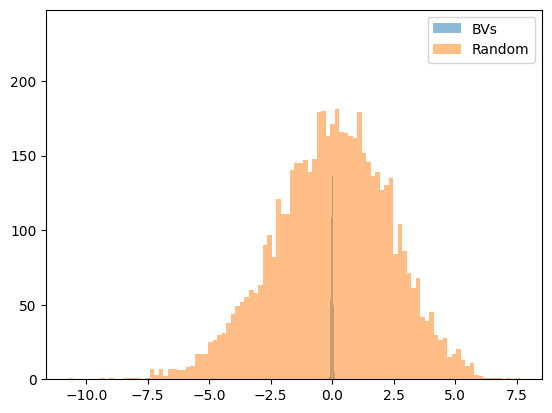

In [29]:
# Now we can calculate the stress of the belief vectors

belief_vectors = df_for_stress.values.tolist()

print("Number of belief vectors: ", len(belief_vectors))
example_vector_index = 2
print("Example BV: ", belief_vectors[example_vector_index])
print("Length: ", len(belief_vectors[example_vector_index]))

# Set all NaN values to 0
belief_vectors = [[0 if np.isnan(x) else x for x in vec] for vec in belief_vectors]

# Normalise all elements in the vectors
belief_vectors = [[x / np.linalg.norm(vec) for x in vec] for vec in belief_vectors]

# Get counts
counts = [stress(belief_vec, interaction_matrix) for belief_vec in belief_vectors]

# Generate K random belief vectors
initial_vectors = np.random.choice([-1, 0, 1], size=(len(belief_vectors), 98))

# Calculate stress for each belief vector
count_random = [stress(belief_vec, interaction_matrix) for belief_vec in initial_vectors]


# Compare the stress histograms 
import matplotlib.pyplot as plt
plt.hist(counts, bins=100, alpha=0.5, label='BVs')
plt.hist(count_random, bins=100, alpha=0.5, label='Random')
plt.legend(loc='upper right')
plt.show()